In [1]:
import numpy as np 
import pandas as pd

# tableau des données
data = pd.read_csv("notes.csv", header=0).set_index("Etudiant")
print(data)

X = data.values


            RO  Crypto   UML  PLSQL
Etudiant                           
Aymane    12.0    10.0  12.5   13.0
Adham     14.0    13.0  11.0   10.0
Ziyad     10.0    10.0  14.0   15.0
Youssef   12.0    13.0  15.5   16.0
Amina     14.5    14.5  15.0   15.0
Manal     11.0    10.0   8.0    7.0
Akram      7.0     8.0   8.0    8.5
Karim      6.0     7.0  14.0   13.5
Jihan     14.0    14.5  14.5   14.0


 #  Tableau des données centrées réduites
 

In [2]:
import numpy as np
Xmean = np.mean(data, axis=0)

# Soustraire la moyenne de chaque colonne à chaque valeur : centrer les valeurs
Xc = data-Xmean
Xstd = np.std(data, axis=0)
# Divisé les valeurs de la dataframe par l'écart-type de chaque colonne
Xcr = Xc/Xstd
print(Xcr)

                RO    Crypto       UML     PLSQL
Etudiant                                        
Aymane    0.290619 -0.428944  0.000000  0.185504
Adham     0.988105  0.729204 -0.551825 -0.816216
Ziyad    -0.406867 -0.428944  0.551825  0.853316
Youssef   0.290619  0.729204  1.103651  1.187223
Amina     1.162476  1.308278  0.919709  0.853316
Manal    -0.058124 -0.428944 -1.655476 -1.817935
Akram    -1.453095 -1.201042 -1.655476 -1.317075
Karim    -1.801838 -1.587091  0.551825  0.352457
Jihan     0.988105  1.308278  0.735767  0.519410


# Matrice de corrélation

In [3]:
import pandas as pd

# Si les données centrées réduites on calcule
# Matrice de correlations
matrice_correlation = pd.DataFrame(Xcr, columns=data.columns, index=data.index).corr()
print(matrice_correlation)
X_cor = matrice_correlation.values

              RO    Crypto       UML     PLSQL
RO      1.000000  0.936191  0.317178  0.237208
Crypto  0.936191  1.000000  0.461569  0.380347
UML     0.317178  0.461569  1.000000  0.975885
PLSQL   0.237208  0.380347  0.975885  1.000000


# Calcul vecteur propre et valeur propre

In [4]:
from numpy import linalg as LA

# Calcul des vecteurs et valeurs propres de la matrice de covariance 
valeurs_propres, vecteurs_propres = LA.eig(X_cor)
print(valeurs_propres)
print("----------------------------")
print(vecteurs_propres)

[2.65976874 1.26859228 0.05172443 0.01991454]
----------------------------
[[-0.46323697 -0.56514438 -0.68187717 -0.0326628 ]
 [-0.51945594 -0.44860001  0.71967642  0.10483036]
 [-0.52253784  0.45567925  0.01183347 -0.72053494]
 [-0.49247461  0.52127371 -0.13026643  0.6846701 ]]


In [10]:
# Calcul de l'information récupéré en pourcentage
info_recupere  = (valeurs_propres / sum(valeurs_propres) * 100)
print(info_recupere)

[66.49421854 31.71480707  1.29311081  0.49786358]


# EBOULIS DES VALEURS PROPRES

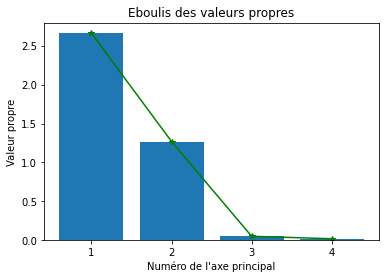

In [11]:
#éboulis des valeurs propres

import matplotlib.pyplot as plt 

plt.bar(np.arange(1,data.shape[1]+1),valeurs_propres)        
plt.plot(np.arange(1,data.shape[1]+1),valeurs_propres, 'g*-')
axes = plt.gca()
axes.xaxis.set_ticks(np.arange(1,data.shape[1]+1)) 
plt.title("Eboulis des valeurs propres")
plt.ylabel("Valeur propre")
plt.xlabel("Numéro de l'axe principal")

plt.show()

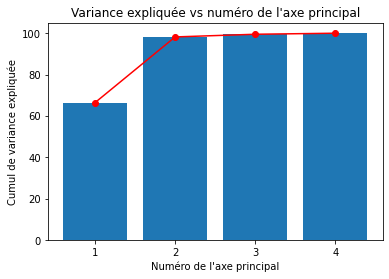

In [12]:
plt.figure(3)
plt.clf()
plt.bar(np.arange(1,data.shape[1]+1),np.cumsum(info_recupere))
plt.plot(np.arange(1,data.shape[1]+1),np.cumsum(info_recupere), 'ro-')
axes = plt.gca()
axes.xaxis.set_ticks(np.arange(1,data.shape[1]+1)) 
plt.title("Variance expliquée vs numéro de l'axe principal")
plt.ylabel("Cumul de variance expliquée")
plt.xlabel("Numéro de l'axe principal")
plt.show()

# COMPOSANTES PRINCIPALES

In [13]:
composants_principaux = vecteurs_propres[:,0:2]
print(composants_principaux)

# Calcul de l'information récupéré en pourcentage
axe1_info = info_recupere[0]
axe2_info = info_recupere[1]
print("------------------------------------")
# axe1_info est la part d’inertie expliquée par le 1er axe factoriel (ou 1ère composante)
print(axe1_info)
print(axe2_info)

[[-0.46323697 -0.56514438]
 [-0.51945594 -0.44860001]
 [-0.52253784  0.45567925]
 [-0.49247461  0.52127371]]
------------------------------------
66.49421853683971
31.714807073898687


# Représentation des individus 

                 0         1
Etudiant                    
Aymane   -0.003164  0.124880
Adham    -0.146201 -1.562470
Ziyad    -0.297293  1.118629
Youssef  -1.674791  0.630416
Amina    -2.118914 -0.379957
Manal     2.010078 -1.476735
Akram     2.810691 -0.080926
Karim     1.197177  2.165450
Jihan    -1.777582 -0.539287


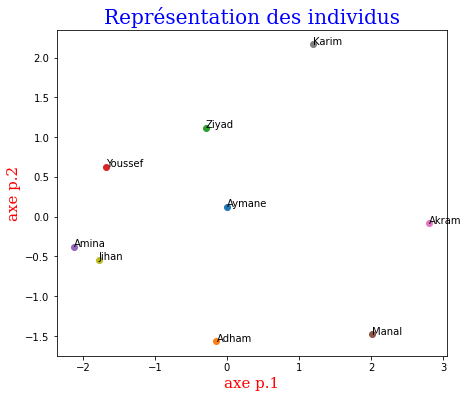

In [14]:
figure = plt.figure(figsize=(7,6)) # définir une figure de taille



Newdata = Xcr.dot(composants_principaux)
print(Newdata)
Newdata.columns = ["axe1", "axe2"]



#placement des étiquettes des observations
for i in range(data.shape[0]):
    plt.scatter(Newdata.values[i,0],Newdata.values[i,1])
    plt.annotate(data.index[i],(Newdata.values[i,0],Newdata.values[i,1]))

#ajouter les axes
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'red','size':15}

plt.title("Représentation des individus", fontdict = font1)
plt.xlabel("axe p.1", fontdict = font2)
plt.ylabel("axe p.2", fontdict = font2)

#affichage
plt.show()

# QUALITE DE REPRESENTATION

Pour calculer la qualité de représentation des individus sur les axes, nous devons d’abord calculer les carrés des distances à l’origine des individus, qui correspondent également à leur contribution dans l’inertie totale

𝑑2𝑖=∑𝑝𝑗=1𝑧2𝑖𝑗

In [15]:
# QUALITE 
di = np.sum(Xcr**2,axis=1) 
print(di)


Etudiant
Aymane     0.302864
Adham      2.478809
Ziyad      1.382193
Youssef    3.243741
Amina      4.636956
Manal      6.232859
Akram      8.029277
Karim      6.194218
Jihan      3.499083
dtype: float64


In [16]:
cos2 = Newdata.values**2
print(cos2)

[[1.00107452e-05 1.55951356e-02]
 [2.13747561e-02 2.44131266e+00]
 [8.83832583e-02 1.25133149e+00]
 [2.80492578e+00 3.97424286e-01]
 [4.48979746e+00 1.44367262e-01]
 [4.04041376e+00 2.18074693e+00]
 [7.89998424e+00 6.54909785e-03]
 [1.43323181e+00 4.68917327e+00]
 [3.15979759e+00 2.90830406e-01]]


In [17]:
cos2 = Newdata.values**2
di2=di**2
for j in range(Newdata.shape[1]):
    cos2[:,j] = cos2[:,j]/di2
pd.DataFrame({'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}, index=data.index)

,COS2_1,COS2_2
Etudiant,,
Aymane,0.000109,0.170018
Adham,0.003479,0.397317
Ziyad,0.046263,0.654990
Youssef,0.266581,0.037771
Amina,0.208815,0.006714
Manal,0.104004,0.056135
Akram,0.122539,0.000102
Karim,0.037355,0.122215
Jihan,0.258078,0.023754


# CERCLE DE CORRELATION

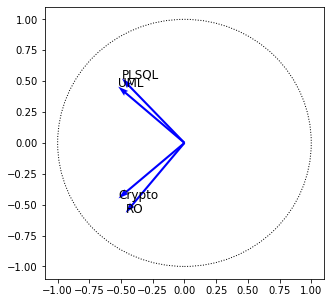

In [18]:
import matplotlib.pyplot as plt

# ... Votre code précédent ...

# Obtenez les noms des variables à partir de votre DataFrame data
labels = data.columns

# Sous-figure pour le cercle de corrélation (à gauche)
plt.subplots(figsize=(5, 5))

# Tracer un cercle unitaire
circle = plt.Circle((0, 0), 1, fill=False, color='black', linestyle='dotted')
plt.gca().add_patch(circle)

# Tracer les vecteurs propres (composantes principales) avec les noms des variables
for i in range(len(composants_principaux)):
    x, y = composants_principaux[i, 0], composants_principaux[i, 1]
    plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color='b')
    plt.text(x, y, labels[i], fontsize=12)

# ... Le reste de votre code ...


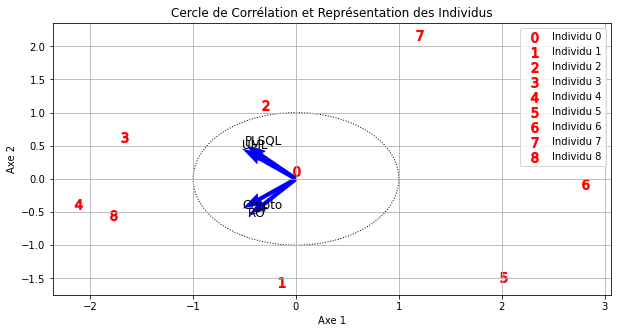

In [19]:
import matplotlib.pyplot as plt

# ... (Votre code précédent) ...

# Créez une figure pour le cercle de corrélation et la représentation des individus
fig, ax = plt.subplots(figsize=(10, 5))

# Tracer le cercle de corrélation des variables
circle = plt.Circle((0, 0), 1, fill=False, color='black', linestyle='dotted')
ax.add_patch(circle)

# Tracer les vecteurs propres (composantes principales) avec les noms des variables
for i in range(len(composants_principaux)):
    x, y = composants_principaux[i, 0], composants_principaux[i, 1]
    plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color='b')
    plt.text(x, y, labels[i], fontsize=12)

# Affichez les individus au sein du cercle de corrélation des variables
for i in range(Newdata.shape[0]):
    x, y = Newdata.values[i, 0], Newdata.values[i, 1]
    plt.scatter(x, y, marker=f"${i}$", s=100, color='r', label=f"Individu {i}")

# Ajoutez des titres et des étiquettes d'axe pour le cercle de corrélation
plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.title("Cercle de Corrélation et Représentation des Individus")

# Affichez le graphique
plt.legend()
plt.grid()
plt.show()
